# Analysing Crime Statistics Dataset
The Crime statistics dataset contains all offences against the person and property that were reported to police between 2014 to 2019 in South Australian suburbs. The dataset contains information about the crime reported date, suburb incident occurred,
Postcode, 3 levels of description of the offence, and the offence count. 

This Analysis was done in order to complete the assignment of FIT1043 - Introduction to Data Science, Monash University Malaysia in Semester 2 2019. The answer is now modified for portfolio purpose.

In [1]:
#importing some libraries that we will be working with
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline

In [2]:
#reading the file
crime = pd.read_csv("Crime_Statistics_SA_2014_2019.csv")

In [3]:
crime.head()

,Reported Date,Suburb - Incident,Postcode - Incident,Offence Level 1 Description,Offence Level 2 Description,Offence Level 3 Description,Offence Count
0,2014-01-01,ADELAIDE,5000,OFFENCES AGAINST PROPERTY,PROPERTY DAMAGE AND ENVIRONMENTAL,Other property damage and environmental,4.0
1,2014-01-01,ADELAIDE,5000,OFFENCES AGAINST PROPERTY,THEFT AND RELATED OFFENCES,Other theft,8.0
2,2014-01-01,ADELAIDE,5000,OFFENCES AGAINST THE PERSON,ACTS INTENDED TO CAUSE INJURY,Assault Police,2.0
3,2014-01-01,ADELAIDE,5000,OFFENCES AGAINST THE PERSON,ACTS INTENDED TO CAUSE INJURY,Common Assault,2.0
4,2014-01-01,ADELAIDE,5000,OFFENCES AGAINST THE PERSON,ACTS INTENDED TO CAUSE INJURY,Serious Assault not resulting in injury,4.0


### Data Auditing
#### Removing NULL values if any

In [4]:
crime.shape

(385296, 7)

In [5]:
np.count_nonzero(crime.isnull().values)

562

In [6]:
#Since the result is greater than 0, it is confirmed that there are 562 null values in the dataset.
crime.dropna(inplace = True)

In [7]:
#check if the row(s) with any NULL value have been removed
crime.shape

(384888, 7)

#### Fixing incorrect data types

In [8]:
#checking data types of each column
crime.dtypes

Reported Date                   object
Suburb - Incident               object
Postcode - Incident             object
Offence Level 1 Description     object
Offence Level 2 Description     object
Offence Level 3 Description     object
Offence Count                  float64
dtype: object

In [9]:
#Reported Date has incorrect datatype, it should be a Date Time object
crime['Reported Date'] = pd.to_datetime(crime['Reported Date']) #change to datetime format

print(crime['Reported Date'].dtypes) #check if the data type has changed

datetime64[ns]


## Data Exploration
#### Checking the data descriptive of Offence Count
Offence Count describes the number of occurence of the crime

In [10]:
crime['Offence Count'].describe()[['count','mean','std','min','max']]

count    384888.000000
mean          1.164983
std           0.560929
min           1.000000
max          28.000000
Name: Offence Count, dtype: float64

#### Exploring Offence Level 1 Description;
- Displaying unique value of Offence Level 1 and the number of their occurence
- Counting the percentage of each unique value falls under Offence Level 1

In [11]:
uniqueVal1, count1 = np.unique(crime['Offence Level 1 Description'],return_counts = True)

In [12]:
for i in range(len(uniqueVal1)):
    print(uniqueVal1[i],":",count1[i])

OFFENCES AGAINST PROPERTY : 298226
OFFENCES AGAINST THE PERSON : 86662


In [13]:
#Percentage of each Level 1 Offence
for i in range(len(uniqueVal1)):
    percentage = count1[i]/sum(count1)*100
    print(uniqueVal1[i],":",round(percentage,2),"%")

OFFENCES AGAINST PROPERTY : 77.48 %
OFFENCES AGAINST THE PERSON : 22.52 %


#### Exploring Offence Level 2 Description;
- Displaying unique value of Offence Level 2 and the number of their occurence
- Counting the percentage of each unique value falls under Offence Level 2
- Counting Serious Criminal Trespasses that have occurred with more than 1 offence count

In [14]:
uniqueVal2, count2 = np.unique(crime['Offence Level 2 Description'],return_counts = True)

for i in range(len(uniqueVal2)):
    print(uniqueVal2[i],":",count2[i])

ACTS INTENDED TO CAUSE INJURY : 63663
FRAUD DECEPTION AND RELATED OFFENCES : 11566
HOMICIDE AND RELATED OFFENCES : 225
OTHER OFFENCES AGAINST THE PERSON : 12313
PROPERTY DAMAGE AND ENVIRONMENTAL : 79991
ROBBERY AND RELATED OFFENCES : 2602
SERIOUS CRIMINAL TRESPASS : 53839
SEXUAL ASSAULT AND RELATED OFFENCES : 7859
THEFT AND RELATED OFFENCES : 152830


In [15]:
#Percentage of each Level 2 Offence
for i in range(len(uniqueVal2)):
    percentage = count2[i]/sum(count2)*100
    print(uniqueVal2[i],":",round(percentage,2),"%")

ACTS INTENDED TO CAUSE INJURY : 16.54 %
FRAUD DECEPTION AND RELATED OFFENCES : 3.01 %
HOMICIDE AND RELATED OFFENCES : 0.06 %
OTHER OFFENCES AGAINST THE PERSON : 3.2 %
PROPERTY DAMAGE AND ENVIRONMENTAL : 20.78 %
ROBBERY AND RELATED OFFENCES : 0.68 %
SERIOUS CRIMINAL TRESPASS : 13.99 %
SEXUAL ASSAULT AND RELATED OFFENCES : 2.04 %
THEFT AND RELATED OFFENCES : 39.71 %


In [16]:
#Counting Serious Criminal Trespasses that have occurred with more than 1 offence count
filt = (crime['Offence Level 2 Description'] == 'SERIOUS CRIMINAL TRESPASS')
crimeFilt = crime[filt]
filt = (crimeFilt['Offence Count'] > 1)
crimeFilt = crimeFilt[filt]
count = crimeFilt.shape
print(count[0])

4193


## Investigating Offence Count in different suburbs and different years
#### Investigating the number of crimes per year

In [17]:
crime['Year'] = crime['Reported Date'].dt.year #Extracting 'year' from column "Reported Date"

In [18]:
crime.head()

,Reported Date,Suburb - Incident,Postcode - Incident,Offence Level 1 Description,Offence Level 2 Description,Offence Level 3 Description,Offence Count,Year
0,2014-01-01,ADELAIDE,5000,OFFENCES AGAINST PROPERTY,PROPERTY DAMAGE AND ENVIRONMENTAL,Other property damage and environmental,4.0,2014
1,2014-01-01,ADELAIDE,5000,OFFENCES AGAINST PROPERTY,THEFT AND RELATED OFFENCES,Other theft,8.0,2014
2,2014-01-01,ADELAIDE,5000,OFFENCES AGAINST THE PERSON,ACTS INTENDED TO CAUSE INJURY,Assault Police,2.0,2014
3,2014-01-01,ADELAIDE,5000,OFFENCES AGAINST THE PERSON,ACTS INTENDED TO CAUSE INJURY,Common Assault,2.0,2014
4,2014-01-01,ADELAIDE,5000,OFFENCES AGAINST THE PERSON,ACTS INTENDED TO CAUSE INJURY,Serious Assault not resulting in injury,4.0,2014


In [19]:
groupbyYear = crime.groupby('Year').agg(Frequency = ('Year','count'))
groupbyYear

,Frequency
Year,
2014,87658
2015,90936
2016,92036
2017,42961
2018,47522
2019,23775


Text(0.5, 1.0, 'Number of Crimes Per Year (2014-2019)')

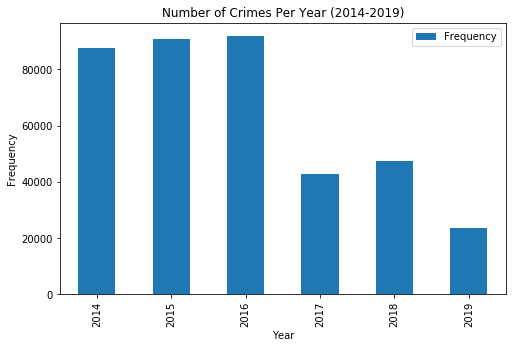

In [20]:
ax = groupbyYear.plot.bar(figsize=(8,5))
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.title('Number of Crimes Per Year (2014-2019)')

Graph above represents the number of crimes occur per year from 2014 to 2019. Although for the first 3 years (2014-2016), the number of crimes increased, there is a remarkable drop from 92063 crimes in 2016 to 42976 crimes in 2017. In addition to this, even though there is a slight increase of number of crimes in 2018, the number of crimes in 2019 decreased up to 50%.

#### Investigating the total number of crimes in different suburbs
- Computing the total number of crimes in each suburb

In [21]:
#We first aggregate the data then flatten it.
groupbySuburb = crime.groupby('Suburb - Incident').agg(Frequency = ('Suburb - Incident','count'))

In [22]:
groupbySuburb = groupbySuburb.reset_index() #turn 'Suburb - Incident' groups into column values

In [23]:
groupbySuburb.head()

,Suburb - Incident,Frequency
0,ABERFOYLE PARK,1183
1,ADELAIDE,11642
2,ADELAIDE AIRPORT,614
3,AGERY,5
4,ALAWOONA,7


- Plotting a histogram of the total number of crimes in different suburbs

Text(0, 0.5, '# of Suburbs')

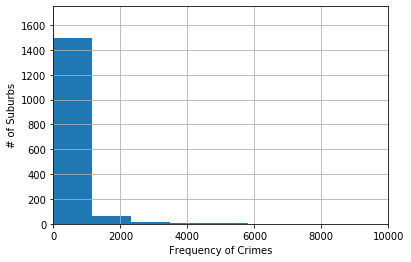

In [24]:
groupbySuburb['Frequency'].hist(bins=10)
plt.xlim(0,10000)               
plt.ylim(0,1750)
plt.xlabel('Frequency of Crimes')
plt.ylabel('# of Suburbs')

In [25]:
groupbySuburb['Frequency'].describe()[['mean','50%']]

mean    243.44592
50%      15.00000
Name: Frequency, dtype: float64

The shape of histogram is skewed right (mean > median). This happens because the number of suburbs has a few large values that drive the mean upward yet do not affect the position of median. From here, we can conclude that the frequency of crimes in most of the suburbs is low compared to the rest of the suburbs.

- Analysing suburbs with the total number of crimes that are greater than 5000 then plotting a bar chart

In [26]:
filt = ((groupbySuburb['Frequency'] > 5000)) #filtering the suburbs that have total number of crimes > 5000
greatCrime = groupbySuburb[filt]
greatCrime

,Suburb - Incident,Frequency
1,ADELAIDE,11642
851,MORPHETT VALE,5133
866,MOUNT GAMBIER,5031
900,MURRAY BRIDGE,5158
962,NOT DISCLOSED,6458
1092,PORT AUGUSTA,5174


Text(0.5, 1.0, 'Highest Number of Crimes')

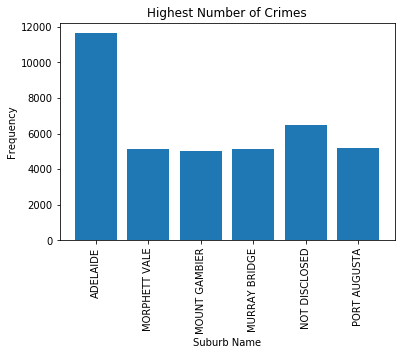

In [27]:
x_pos = np.arange(len(greatCrime['Suburb - Incident']))
plt.bar(x_pos, greatCrime['Frequency'])

#use the plt.xticks function to custom labels
plt.xticks(x_pos, greatCrime['Suburb - Incident'], rotation = 90)

#customing label for the graph
plt.xlabel('Suburb Name')
plt.ylabel('Frequency')
plt.title('Highest Number of Crimes')

- Calculating the number of days that at least 15 crimes have occurred per day for each suburb

In [28]:
groupbyDate = crime.groupby(['Reported Date', 'Suburb - Incident'])['Offence Count'].agg('sum')
groupbyDate = groupbyDate.reset_index(name = 'Frequency')
filt = groupbyDate['Frequency'] >= 15
groupbyDate = groupbyDate[filt]
groupbyDate

,Reported Date,Suburb - Incident,Frequency
0,2014-01-01,ADELAIDE,22.0
182,2014-01-02,ADELAIDE,15.0
317,2014-01-03,ADELAIDE,22.0
461,2014-01-04,ADELAIDE,17.0
774,2014-01-06,ADELAIDE,26.0
...,...,...,...
240891,2019-11-01,ADELAIDE,16.0
241054,2019-11-02,ADELAIDE,18.0
241389,2019-12-01,ADELAIDE,16.0
241550,2019-12-02,ADELAIDE,17.0


- Determining which suburbs do have at least one day where the daily number of crimes are more than 15 then plotting a bar graph representing the number of days that at least 15 crimes have occured for the suburbs

In [29]:
groupbySuburbTotal = groupbyDate.groupby('Suburb - Incident').size().reset_index(name = 'Frequency')
filt = groupbySuburbTotal['Frequency'] > 15
result = groupbySuburbTotal[filt]
result

,Suburb - Incident,Frequency
0,ADELAIDE,877


From the table above we know that only Adelaide has at least one day where the daily number of crimes are more than 15.

In [30]:
filt = groupbyDate['Suburb - Incident'] == 'ADELAIDE'
groupbyDate = groupbyDate[filt]

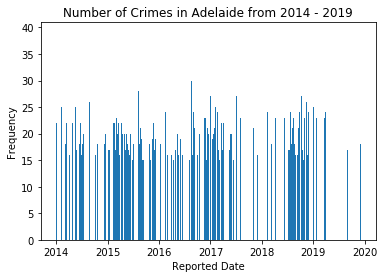

In [31]:
plt.bar(groupbyDate['Reported Date'],groupbyDate['Frequency'],width = 1)

#customing label for the graph
plt.xlabel('Reported Date')
plt.ylabel('Frequency')
plt.title('Number of Crimes in Adelaide from 2014 - 2019')

plt.show()

- Determining outliers from the previous data and removing them. A bar graph without outliers will be plotted.

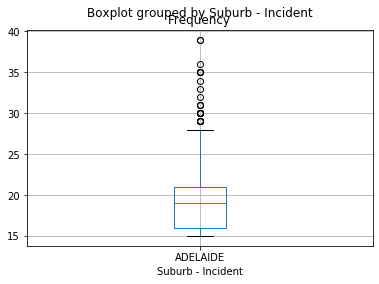

In [32]:
groupbyDate.boxplot(column = 'Frequency', by = 'Suburb - Incident')

We can see from the graph above that the outliers are those greater than approximately 28 days.

In [33]:
filt = ~(groupbyDate['Frequency'] > 28)
groupbyDate = groupbyDate[filt]

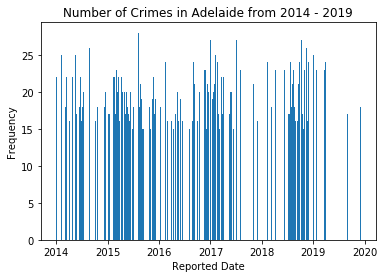

In [34]:
plt.bar(groupbyDate['Reported Date'],groupbyDate['Frequency'],width = 1)

#customing label for the graph
plt.xlabel('Reported Date')
plt.ylabel('Frequency')
plt.title('Number of Crimes in Adelaide from 2014 - 2019')

plt.show()

Comparing the bar graph with and without outliers, the graph without outliers is easier to interpret because:
1.	Data can be said more accurate as the outliers will not hurt or affect the sample.
2.	The y-axis of step 3’s graph only is up to 30 while step 2’s has wider range of y-axis.